In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize

Consider a non-dividend-paying stock with current value S = 100. In the risk-neutral measure the stock follows a jump-diffusion process 

$$ dS/S = (r − \lambda^Q \gamma)dt + \sigma dW_t + \gamma dN_t$$

Take $\gamma$ = −0.08 (i.e. the stock price is subject to downward 8% jumps ), $\lambda^Q$ = 0.2 (i.e. on
average the stock experiences a jump every 5 years), $\sigma$ = 0.2, r = 0.04. Compute the value
of a call option with expirations T = 0.02, 0.08, 0.25, 0.5 (i.e. approximately 1 week, 1
month, 3 months, 6 months). and strikes K/S = 0.8, 0.9, 1, 1.1. For every expiration, plot
the Black-Scholes implied volatility of the option as a function of strike.

In [50]:
S0 = 100.
gamma = -.08
lam = .2
sigma = .2
r = .04

Ts = np.array([.02, .08, .25, .5]) # 1 week, 1 month, 3 month, 6 months
Ks = np.array([.8, .9, 1., 1.1])*S0

In [53]:
def bs_call(S, K, T, t, r, sigma, div):
    d1 = 1/(sigma*np.sqrt(T-t))*np.log(S*np.exp(r*(T-t))/K) + sigma*np.sqrt(T-t)/2
    d2 = 1/(sigma*np.sqrt(T-t))*np.log(S*np.exp(r*(T-t))/K) - sigma*np.sqrt(T-t)/2
    return S*np.exp(-div*(T-t))*stats.norm.cdf(d1) - K*np.exp(-r*(T-t))*stats.norm.cdf(d2)

def price_call(S, K, T, t, r, sigma, gamma, lam):
    
    # this function prices the call based on the jump-diffusion model in the lecture
    n_jumps = 50 # the summation in the formula slide 26
    price = 0
    for n in range(n_jumps):
        price += np.exp(-lam*T)*((lam*T)**n)/np.math.factorial(n)* \
        bs_call(S*(1+gamma)**n, K, T, t, r, sigma, lam*gamma)
    return price    

In [54]:
prices = np.zeros((Ts.size, Ks.size))
imp_vols = np.zeros((Ts.size, Ks.size))

In [55]:
for i in range(Ts.size):
    for j in range(Ks.size):
        prices[i, j] = price_call(S0, Ks[j], Ts[i], 0, r, sigma, gamma, lam)

In [56]:
prices

array([[2.00639746e+01, 1.00732624e+01, 1.18014528e+00, 3.34841923e-04],
       [2.02557972e+01, 1.03572479e+01, 2.44829663e+00, 1.33599938e-01],
       [2.08332976e+01, 1.15176577e+01, 4.54565505e+00, 1.17510269e+00],
       [2.18267557e+01, 1.32103380e+01, 6.70957152e+00, 2.82278465e+00]])

In [57]:
for i in range(Ts.size):
    for j in range(Ks.size):
        error = lambda sig: (bs_call(S0, Ks[j], Ts[i], 0, r, sig, 0) - prices[i,j])**2
        imp_vols[i,j]= optimize.fmin(func=error, x0=0.4) 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 28
Optimization terminated successful

In [58]:
imp_vols

array([[0.31398438, 0.25039063, 0.20210938, 0.20054688],
       [0.22140625, 0.20742188, 0.20289063, 0.2015625 ],
       [0.20601563, 0.20414063, 0.20304688, 0.20242188],
       [0.20421875, 0.20351563, 0.20296875, 0.20257813]])

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


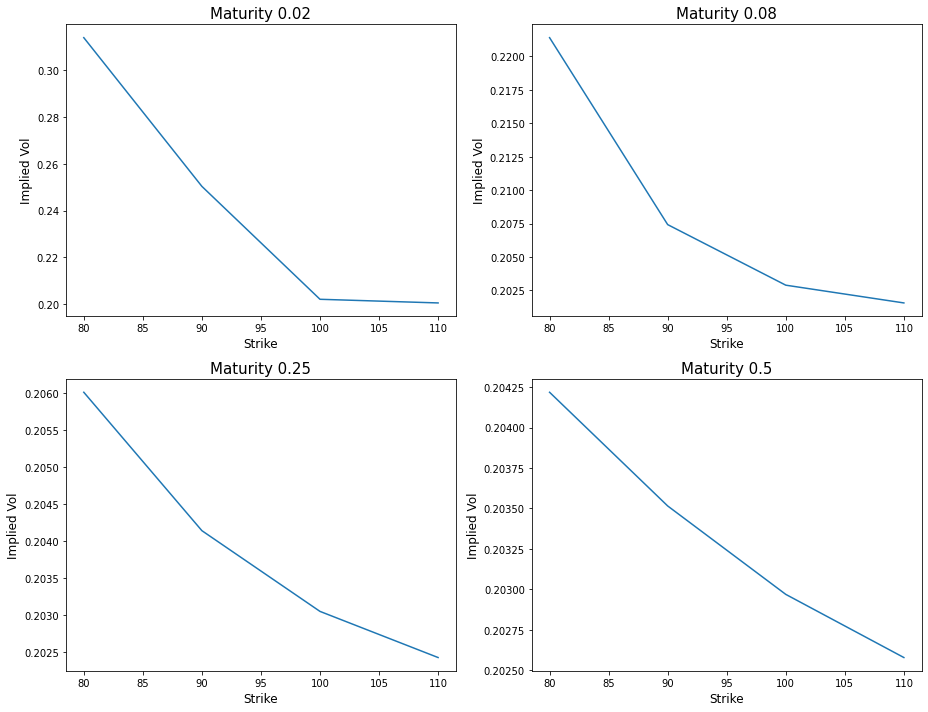

In [66]:
fig, axes = plt.subplots(figsize=(13,10), nrows=2, ncols=2)
axes = axes.flatten()
for i in range(Ts.size):
    ax = axes[i]
    ax.plot(Ks, imp_vols[i,:])
    ax.set_title(f"Maturity {Ts[i]}", size=15)
    ax.set_xlabel("Strike", size=12)
    ax.set_ylabel("Implied Vol", size=12)
fig.tight_layout()
fig.show()

In [101]:
# imp vol surface
from matplotlib import cm

In [123]:
plot_strikes = np.linspace(np.min(Ks), np.max(Ks), 4)
plot_ttm = np.linspace(np.min(Ts), np.max(Ts), 4)
X, Y = np.meshgrid(plot_strikes, plot_ttm)

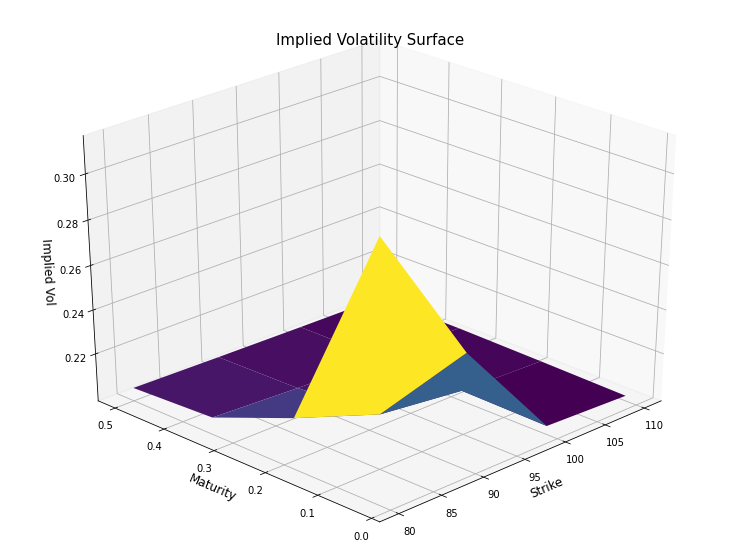

In [125]:
fig = plt.figure(figsize=(13,10))
ax = fig.gca(projection='3d')
#ax.view_init(0, 45)
ax.plot_surface(X, Y, imp_vols, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0.1)
ax.set_xlabel("Strike", size=12)
ax.set_ylabel("Maturity", size=12)
ax.set_zlabel("Implied Vol", size=12)
ax.view_init(30,225)
ax.set_title("Implied Volatility Surface", size=15)
plt.show()